In [1]:
## Chapter 7: Experimenting with Classical Model

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from collections import Counter
import seaborn as sns
import os


# A Iris Datensatz
# a) Datensatz einlesen

print(os.getcwd())
# os.chdir(Path) um Directory festzulegen

X = np.load('iris/iris_features.npy')
y = np.load('iris/iris_labels.npy')
X_test_aug = np.load('iris/iris_test_features_augmented.npy')
y_test_aug = np.load('iris/iris_test_labels_augmented.npy')
X_train_aug = np.load('iris/iris_train_features_augmented.npy')
y_train_aug = np.load('iris/iris_train_labels_augmented.npy')

# X Nearest Centroid
# Objekt instantziieren
m_centr = NearestCentroid()
# Modell fitten
m_centr.fit(X_train_aug, y_train_aug)
# Vorhersagen
predicted_centr = m_centr.predict(X_test_aug)
# Evaluieren
print('Centroid:', accuracy_score(y_test_aug, predicted_centr))
mat = confusion_matrix(y_test_aug, predicted_centr)
print(mat) # True in Reihe, Algorithmus in Spalten (Original: 12 mal Kategorie '1' und Algorithmus(10 mal '2' und 2 mal '2'))


# X k-Nearest Neighbor
print("\n")
# Modell instantziieren
m_k3 = KNeighborsClassifier(n_neighbors=3)
# Modell fitten
m_k3.fit(X_train_aug, y_train_aug)
# Vorhersagen
predicted_k3 = m_k3.predict(X_test_aug)
# Evaluieren
print("3-Nearest:", accuracy_score(y_test_aug, predicted_k3))
print(confusion_matrix(y_test_aug, predicted_k3))


# X Naive Bayes
print("\n")
# Modell instantziieren
m_bayes = GaussianNB()
# Modell fitten
m_bayes.fit(X_train_aug, y_train_aug)
# Vorhersage
predicted_bayes = m_bayes.predict(X_test_aug)
# Evaluieren
print("Naive Bayes:", accuracy_score(y_test_aug, predicted_bayes))
print(confusion_matrix(y_test_aug, predicted_bayes))


# Random Forest
print("\n")
# Modell instantziieren
m_for = RandomForestClassifier(n_estimators=1000)
# Modell fitten
m_for.fit(X_train_aug, y_train_aug)
# Vorhersagen
predicted_for = m_for.predict(X_test_aug)
# Evaluieren
print("Random Forest (1000):", accuracy_score(y_test_aug, predicted_for))
print(confusion_matrix(y_test_aug, predicted_for))


# Support Vectors?

C:\Users\Manue\Documents\Practical Deeplearning
Centroid: 0.9333333333333333
[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]


3-Nearest: 0.9666666666666667
[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


Naive Bayes: 0.9666666666666667
[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


Random Forest (1000): 0.9666666666666667
[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


In [141]:
# Vorgehensweise im Buch

def run(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    print('\tpredictions\t:', clf.predict(X_test))
    print('\tactual labels\t:', y_test)
    print('\tscore = %0.4f' % clf.score(X_test, y_test))
    print("\tacc\t:", accuracy_score(y_test, clf.predict(X_test)))
    print()

def main():
    # Datensätze laden 
    # klassisch
    X = np.load("iris/iris_features.npy")
    y = np.load("iris/iris_labels.npy")
    N = 120
    X_train = X[:N]; X_test = X[N:]
    y_train = y[:N]; y_test = y[N:]
    # augmented
    Xa_train=np.load("iris/iris_train_features_augmented.npy")
    ya_train=np.load("iris/iris_train_labels_augmented.npy")
    Xa_test =np.load("iris/iris_test_features_augmented.npy")
    ya_test =np.load("iris/iris_test_labels_augmented.npy")

    print('Nearest Centroid:')
    run(X_train, y_train, X_test, y_test, NearestCentroid())

    print("k-NN Classifier (n_neighbors=3):")
    run(X_train, y_train, X_test, y_test, 
       KNeighborsClassifier(n_neighbors=3))
    
    print("Naive Bayes Classifier (Gaussian):")
    run(X_train, y_train, X_test, y_test, GaussianNB())
    print("Naive Bayes Classifier (Multinomial):")
    run(X_train, y_train, X_test, y_test, MultinomialNB())

    print("Decision Tree Classifier:")
    run(X_train, y_train, X_test, y_test, DecisionTreeClassifier())
    print("Random Forest Classifier (estimators=5):")
    run(Xa_train, ya_train, Xa_test, ya_test, RandomForestClassifier(n_estimators=5))

    print("SVM linear (C=1.0):")
    run(Xa_train, ya_train, Xa_test, ya_test, SVC(kernel="linear", C=1.0))
    print("SVM RBF (C=1.0, gamma=0.25):")
    run(Xa_train, ya_train, Xa_test, ya_test, SVC(kernel="rbf", C=1.0, gamma=0.25))
    print("SVM RBF (C=1.0, gamma=0.001, augmented):")
    run(Xa_train, ya_train, Xa_test, ya_test, SVC(kernel="rbf", C=1.0, gamma=0.001))
    print("SVM RBF (C=1.0, gamma=0.001, original):")
    run(X_train, y_train, X_test, y_test, SVC(kernel="rbf", C=1.0, gamma=0.001))

main()

Nearest Centroid:
	predictions	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 2 2 0 1 2 1 1 2 2 0 1 1 0 2 0]
	actual labels	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 1 1 1 2 2 0 1 1 0 2 0]
	score = 0.9333
	acc	: 0.9333333333333333

k-NN Classifier (n_neighbors=3):
	predictions	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 2 1 1 2 2 0 1 1 0 2 0]
	actual labels	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 1 1 1 2 2 0 1 1 0 2 0]
	score = 0.9667
	acc	: 0.9666666666666667

Naive Bayes Classifier (Gaussian):
	predictions	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 2 1 1 2 2 0 1 1 0 2 0]
	actual labels	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 1 1 1 2 2 0 1 1 0 2 0]
	score = 0.9667
	acc	: 0.9666666666666667

Naive Bayes Classifier (Multinomial):
	predictions	: [1 0 0 0 2 2 2 2 2 0 2 2 2 0 0 2 2 0 1 2 1 2 2 2 0 1 1 0 2 0]
	actual labels	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 1 1 1 2 2 0 1 1 0 2 0]
	score = 0.7667
	acc	: 0.7666666666666667

Decision Tree Classifier:
	predictions	: [1 0 0 0 2 1 1 2 2 0 2 1 1 0 0 1 2 0 1 

In [159]:
# Breast Cancer Dataset
# Vorgehensweise im Buch

def run(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    print('\tscore = %0.4f' % clf.score(X_test, y_test))
    print()

def main():
    # Datensätze laden 
    # klassisch
    X = np.load("cancer/cancer_features_standard.npy")
    y = np.load("cancer/cancer_target.npy")
    
    # Resampling - nicht notwendig, da Datensatz bereits ungeordnet > Vereinheitlicht Ergebnisse mit BUch
    np.random.seed(12345)
    idx = np.argsort(np.random.random(y.shape[0]))
    X = X[idx]
    y = y[idx]
    
    N = 455
    X_train = X[:N]; X_test = X[N:]
    y_train = y[:N]; y_test = y[N:]
    np.random.seed() # Damit ERgebnisse der Random Forest-Modelle nicht immer gleich sind


    
    print('Nearest Centroid:')
    run(X_train, y_train, X_test, y_test, NearestCentroid())

    print("k-NN Classifier (n_neighbors=3):")
    run(X_train, y_train, X_test, y_test, 
       KNeighborsClassifier(n_neighbors=3))
    
    print("k-NN Classifier (n_neighbors=7):")
    run(X_train, y_train, X_test, y_test, 
       KNeighborsClassifier(n_neighbors=7))

    print("Naive Bayes Classifier (Gaussian):")
    run(X_train, y_train, X_test, y_test, GaussianNB())

    print("Decision Tree Classifier:")
    run(X_train, y_train, X_test, y_test, DecisionTreeClassifier())
    
    print("Random Forest Classifier (estimators=5):")
    run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=5))

    print("Random Forest Classifier (estimators=50):")
    run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=50))

    print("SVM linear (C=1.0):")
    run(X_train, y_train, X_test, y_test, SVC(kernel="linear", C=1.0))

    print("SVM RBF (C=1.0, gamma=0.03333):")
    run(X_train, y_train, X_test, y_test, SVC(kernel="rbf", C=1.0, gamma=0.03333))
    
main()

Nearest Centroid:
	score = 0.9298

k-NN Classifier (n_neighbors=3):
	score = 0.9649

k-NN Classifier (n_neighbors=7):
	score = 0.9825

Naive Bayes Classifier (Gaussian):
	score = 0.9386

Decision Tree Classifier:
	score = 0.9474

Random Forest Classifier (estimators=5):
	score = 0.9474

Random Forest Classifier (estimators=50):
	score = 0.9561

SVM linear (C=1.0):
	score = 0.9737

SVM RBF (C=1.0, gamma=0.03333):
	score = 0.9649



In [179]:
# Breast Cancer Dataset mit k-fold Cross-Validation
# Vorgehensweise im Buch

def run(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

# Um Den Datensatz aufzuteilen
def split(X, y, k, m):
    # number of samples per fold = Gesamt/m(anzahl von Folds)
    ns = int(y.shape[0]/m)
    s = []
    # Teil den Datensatz in m Teile mit Training und Testsatz in einer Liste
    for i in range(m):
        s.append([X[(ns*i):(ns*i+ns)],
                y[(ns*i):(ns*i+ns)]])
        
    # Wählt den Testdatensatz aus für den k-ten Durchlauf
    X_test, y_test = s[k]
    X_train = []
    y_train = []
    # Wählt den Trainingsdatensatz aus
    for i in range(m):
        if i==k:
            continue
        else:
            a, b = s[i]
            X_train.append(a)
            y_train.append(b) 
    X_train = np.array(X_train).reshape((m-1)*ns, 30)
    y_train = np.array(y_train).reshape((m-1)*ns)
    return [X_train, y_train, X_test, y_test]

# pp = prettyprint Function, die die Scores in jedem Fold und den Average ausgibt
def pp(z, k, s):
    m = z.shape[1]
    print("%-19s: %0.4f +/- %0.4f | " % (s, z[k].mean(), 
                                         z[k].std()/np.sqrt(m)), end="")
    for i in range(m):
        print("%0.4f " % z[k, i], end="")
    print()

import sys

def main():
    # Datensätze laden 
    # klassisch
    X = np.load("cancer/cancer_features_standard.npy")
    y = np.load("cancer/cancer_target.npy")
    
    # Resampling - nicht notwendig, da Datensatz bereits ungeordnet > Vereinheitlicht Ergebnisse mit BUch
    idx = np.argsort(np.random.random(y.shape[0]))
    X = X[idx]
    y = y[idx]
    m = 5 # int(sys.argv[1]) von Buch verwendet?
    z = np.zeros((9, m))

    for k in range(m):
        X_train, y_train, X_test, y_test = split(X, y, k, m)

        z[0, k] = run(X_train, y_train, X_test, y_test, NearestCentroid())

        z[1, k] = run(X_train, y_train, X_test, y_test, 
           KNeighborsClassifier(n_neighbors=3))

        z[2, k] = run(X_train, y_train, X_test, y_test, 
           KNeighborsClassifier(n_neighbors=7))

        z[3, k] = run(X_train, y_train, X_test, y_test, GaussianNB())

        z[4, k] = run(X_train, y_train, X_test, y_test, DecisionTreeClassifier())
    
        z[5, k] = run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=5))

        z[6, k] = run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=50))

        z[7, k] = run(X_train, y_train, X_test, y_test, SVC(kernel="linear", C=1.0))

        z[8, k] = run(X_train, y_train, X_test, y_test, SVC(kernel="rbf", C=1.0, gamma=0.03333))

    pp(z,0,"Nearest") 
    pp(z,1,"3-NN")
    pp(z,2,"7-NN")
    pp(z,3,"Naive Bayes")
    pp(z,4,"Decision Tree")
    pp(z,5,"Random Forest (5)")
    pp(z,6,"Random Forest (50)")
    pp(z,7,"SVM (linear)")
    pp(z,8,"SVM (multinomial)")
    
main()

Nearest            : 0.9274 +/- 0.0058 | 0.9204 0.9115 0.9204 0.9381 0.9469 
3-NN               : 0.9681 +/- 0.0047 | 0.9558 0.9735 0.9558 0.9735 0.9823 
7-NN               : 0.9699 +/- 0.0040 | 0.9558 0.9735 0.9646 0.9823 0.9735 
Naive Bayes        : 0.9363 +/- 0.0116 | 0.9469 0.9292 0.8938 0.9381 0.9735 
Decision Tree      : 0.9239 +/- 0.0085 | 0.9292 0.8938 0.9115 0.9469 0.9381 
Random Forest (5)  : 0.9504 +/- 0.0078 | 0.9381 0.9381 0.9381 0.9558 0.9823 
Random Forest (50) : 0.9593 +/- 0.0116 | 0.9381 0.9735 0.9204 0.9735 0.9912 
SVM (linear)       : 0.9664 +/- 0.0081 | 0.9558 0.9646 0.9646 0.9469 1.0000 
SVM (multinomial)  : 0.9735 +/- 0.0090 | 0.9735 0.9469 0.9558 0.9912 1.0000 


In [219]:
# Crassvalidation mit mehreren Parametern
# mit CV Grid
from sklearn.model_selection import GridSearchCV

gm = (1./30)*2.0**np.array([-4,-3,-2,-1,0,1,2,3])
params = {'C':[0.01,0.1,1.0,2.0,10.0,50.0,100.0], 'gamma':gm}
print(params)

X = np.load("cancer/cancer_features_standard.npy")
y = np.load("cancer/cancer_target.npy")
    
np.random.seed(12345)
idx = np.argsort(np.random.random(y.shape[0]))
X = X[idx]
y = y[idx]
    
N = 455
X_train = X[:N]; X_test = X[N:]
y_train = y[:N]; y_test = y[N:]

svc_grid = GridSearchCV(SVC(kernel='rbf'), params)
svc_grid.fit(X_train, y_train)
print(svc_grid.best_params_) # Beste Parameter
print(svc_grid.best_score_) # Bestes Accuracy Score
print(svc_grid.best_estimator_) # Bestes Modell

{'C': [0.01, 0.1, 1.0, 2.0, 10.0, 50.0, 100.0], 'gamma': array([0.00208333, 0.00416667, 0.00833333, 0.01666667, 0.03333333,
       0.06666667, 0.13333333, 0.26666667])}
{'C': 1.0, 'gamma': 0.03333333333333333}
0.9802197802197803
SVC(gamma=0.03333333333333333)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Models trained on raw images [0, 255]
Models trained on standardized images [0, 1)
Models trained on normalized images [-1, 1]
Models trained on first 15 Components of nromalized images
Nearest Centroid:
	score = 0.7503 (time, train =    0.016, test =    0.061)
k-NN Classifier (n_neighbors=3):
	score = 0.9355 (time, train =    0.155, test =    2.924)
k-NN Classifier (n_neighbors=7):
	score = 0.9376 (time, train =    0.133, test =    4.597)
Naive Bayes Classifier (Gaussian):
	score = 0.7999 (time, train =    0.017, test =    0.014)
Decision Tree Classifier:
	score = 0.8433 (time, train =    2.392, test =    0.005)
Random Forest Classifier (estimators=5):
	score = 0.8831 (time, train =    1.291, test =    0.012)
Random Forest Classifier (estimators=50):
	score = 0.9226 (time, train =   13.357, test =    0.089)
Random Forest Classifier (estimators=500):
	score = 0.9238 (

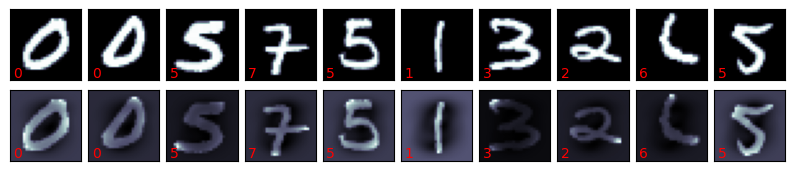

In [9]:
## MNIST-Dataset
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import time
# 3 Datasets, vektorized, standardisiert (/259 = Werte zwischen 0 und 1) und normalisiert (-M/Std)

X_train = np.load("mnist/mnist_train_vectors.npy")
y_train = np.load("mnist/mnist_train_label.npy")
X_test = np.load("mnist/mnist_test_vectors.npy")
y_test = np.load("mnist/mnist_test_label.npy")


# scrabmled Vectors
Xs_train = np.load("mnist/mnist_train_scrambled_vectors.npy")

# standardized
Xstd_train = X_train/256
Xstd_test = X_test/256


# normalized
Xnorm_train = (X_train - X_train.mean(axis=0))/(X_train.std(axis=0)+1e-8)
Xnorm_test = (X_test - X_test.mean(axis=0))/(X_test.std(axis=0)+1e-8)


fig, ax = plt.subplots(2, 10, figsize=(10, 2),
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, axi in enumerate(ax.flat):
    if i < 10:
        data = X_train
    else:
        data = Xnorm_train
        i -= 10
    axi.imshow(data[i].reshape(28, 28), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.text(0.05, 0.05, y_train[i], color="red",
            transform=axi.transAxes)
print(X_train)


def run(X_train, y_train, X_test, y_test, clf):
    s = time.time()
    clf.fit(X_train, y_train)
    e_train = time.time() - s
    s = time.time()
    score = clf.score(X_test, y_test)
    e_test = time.time() - s
    print('\tscore = %0.4f (time, train = %8.3f, test = %8.3f)' % 
          (score, e_train, e_test))
    
    
def train(X_train, ytrain, X_test, y_test):
    # Datensatz ist schon eingelesen

    # Modelle
    print('Nearest Centroid:')
    run(X_train, y_train, X_test, y_test, NearestCentroid())

    print("k-NN Classifier (n_neighbors=3):")
    run(X_train, y_train, X_test, y_test, 
       KNeighborsClassifier(n_neighbors=3))
    
    print("k-NN Classifier (n_neighbors=7):")
    run(X_train, y_train, X_test, y_test, 
       KNeighborsClassifier(n_neighbors=7))

    print("Naive Bayes Classifier (Gaussian):")
    run(X_train, y_train, X_test, y_test, GaussianNB())

    print("Decision Tree Classifier:")
    run(X_train, y_train, X_test, y_test, DecisionTreeClassifier())
    
    print("Random Forest Classifier (estimators=5):")
    run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=5))

    print("Random Forest Classifier (estimators=50):")
    run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=50))

    print("Random Forest Classifier (estimators=500):")
    run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=50))

    print("Random Forest Classifier (estimators=1000):")
    run(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=50))

    # print("SVM linear (C=0.01):")
    # run(X_train, y_train, X_test, y_test, SVC(kernel="linear", C=0.01))

    # print("SVM linear (C=0.1):")
    # run(X_train, y_train, X_test, y_test, SVC(kernel="linear", C=0.1))

    print("SVM linear (C=1.0):")
    run(X_train, y_train, X_test, y_test, LinearSVC(C=1.0, dual=False))

    # print("SVM linear (C=10):")
    # run(X_train, y_train, X_test, y_test, SVC(kernel="linear", C=10))


def main():
    print("Models trained on raw images [0, 255]")
    train(X_train, y_train, X_test, y_test)

    print("Models trained on standardized images [0, 1)")
    train(Xstd_train, y_train, Xstd_test, y_test)

    print('Models trained on normalized images [-1, 1]')
    train(Xnorm_train, y_train, Xnorm_test, y_test)

    print("Models trained on first 15 Components of nromalized images")
    pca = PCA(n_components=15)
    pca.fit(Xnorm_train)
    Xpca_train = pca.transform(X = Xnorm_train)
    Xpca_test = pca.transform(X = Xnorm_test)
    train(Xpca_train, y_train, Xpca_test, y_test)

main()
